In [76]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

sb.set(color_codes = True)
%matplotlib inline

# Boston Housing
### pricing appears to be capped at 500k, houses listed at that may actually be higher

1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per 10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    \% lower status of the population
14. MEDV     Median value of owner-occupied homes in 1000's

In [3]:
boston = pd.read_csv('housing.data', header = None, delim_whitespace = True)
col_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
boston.columns = col_names
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


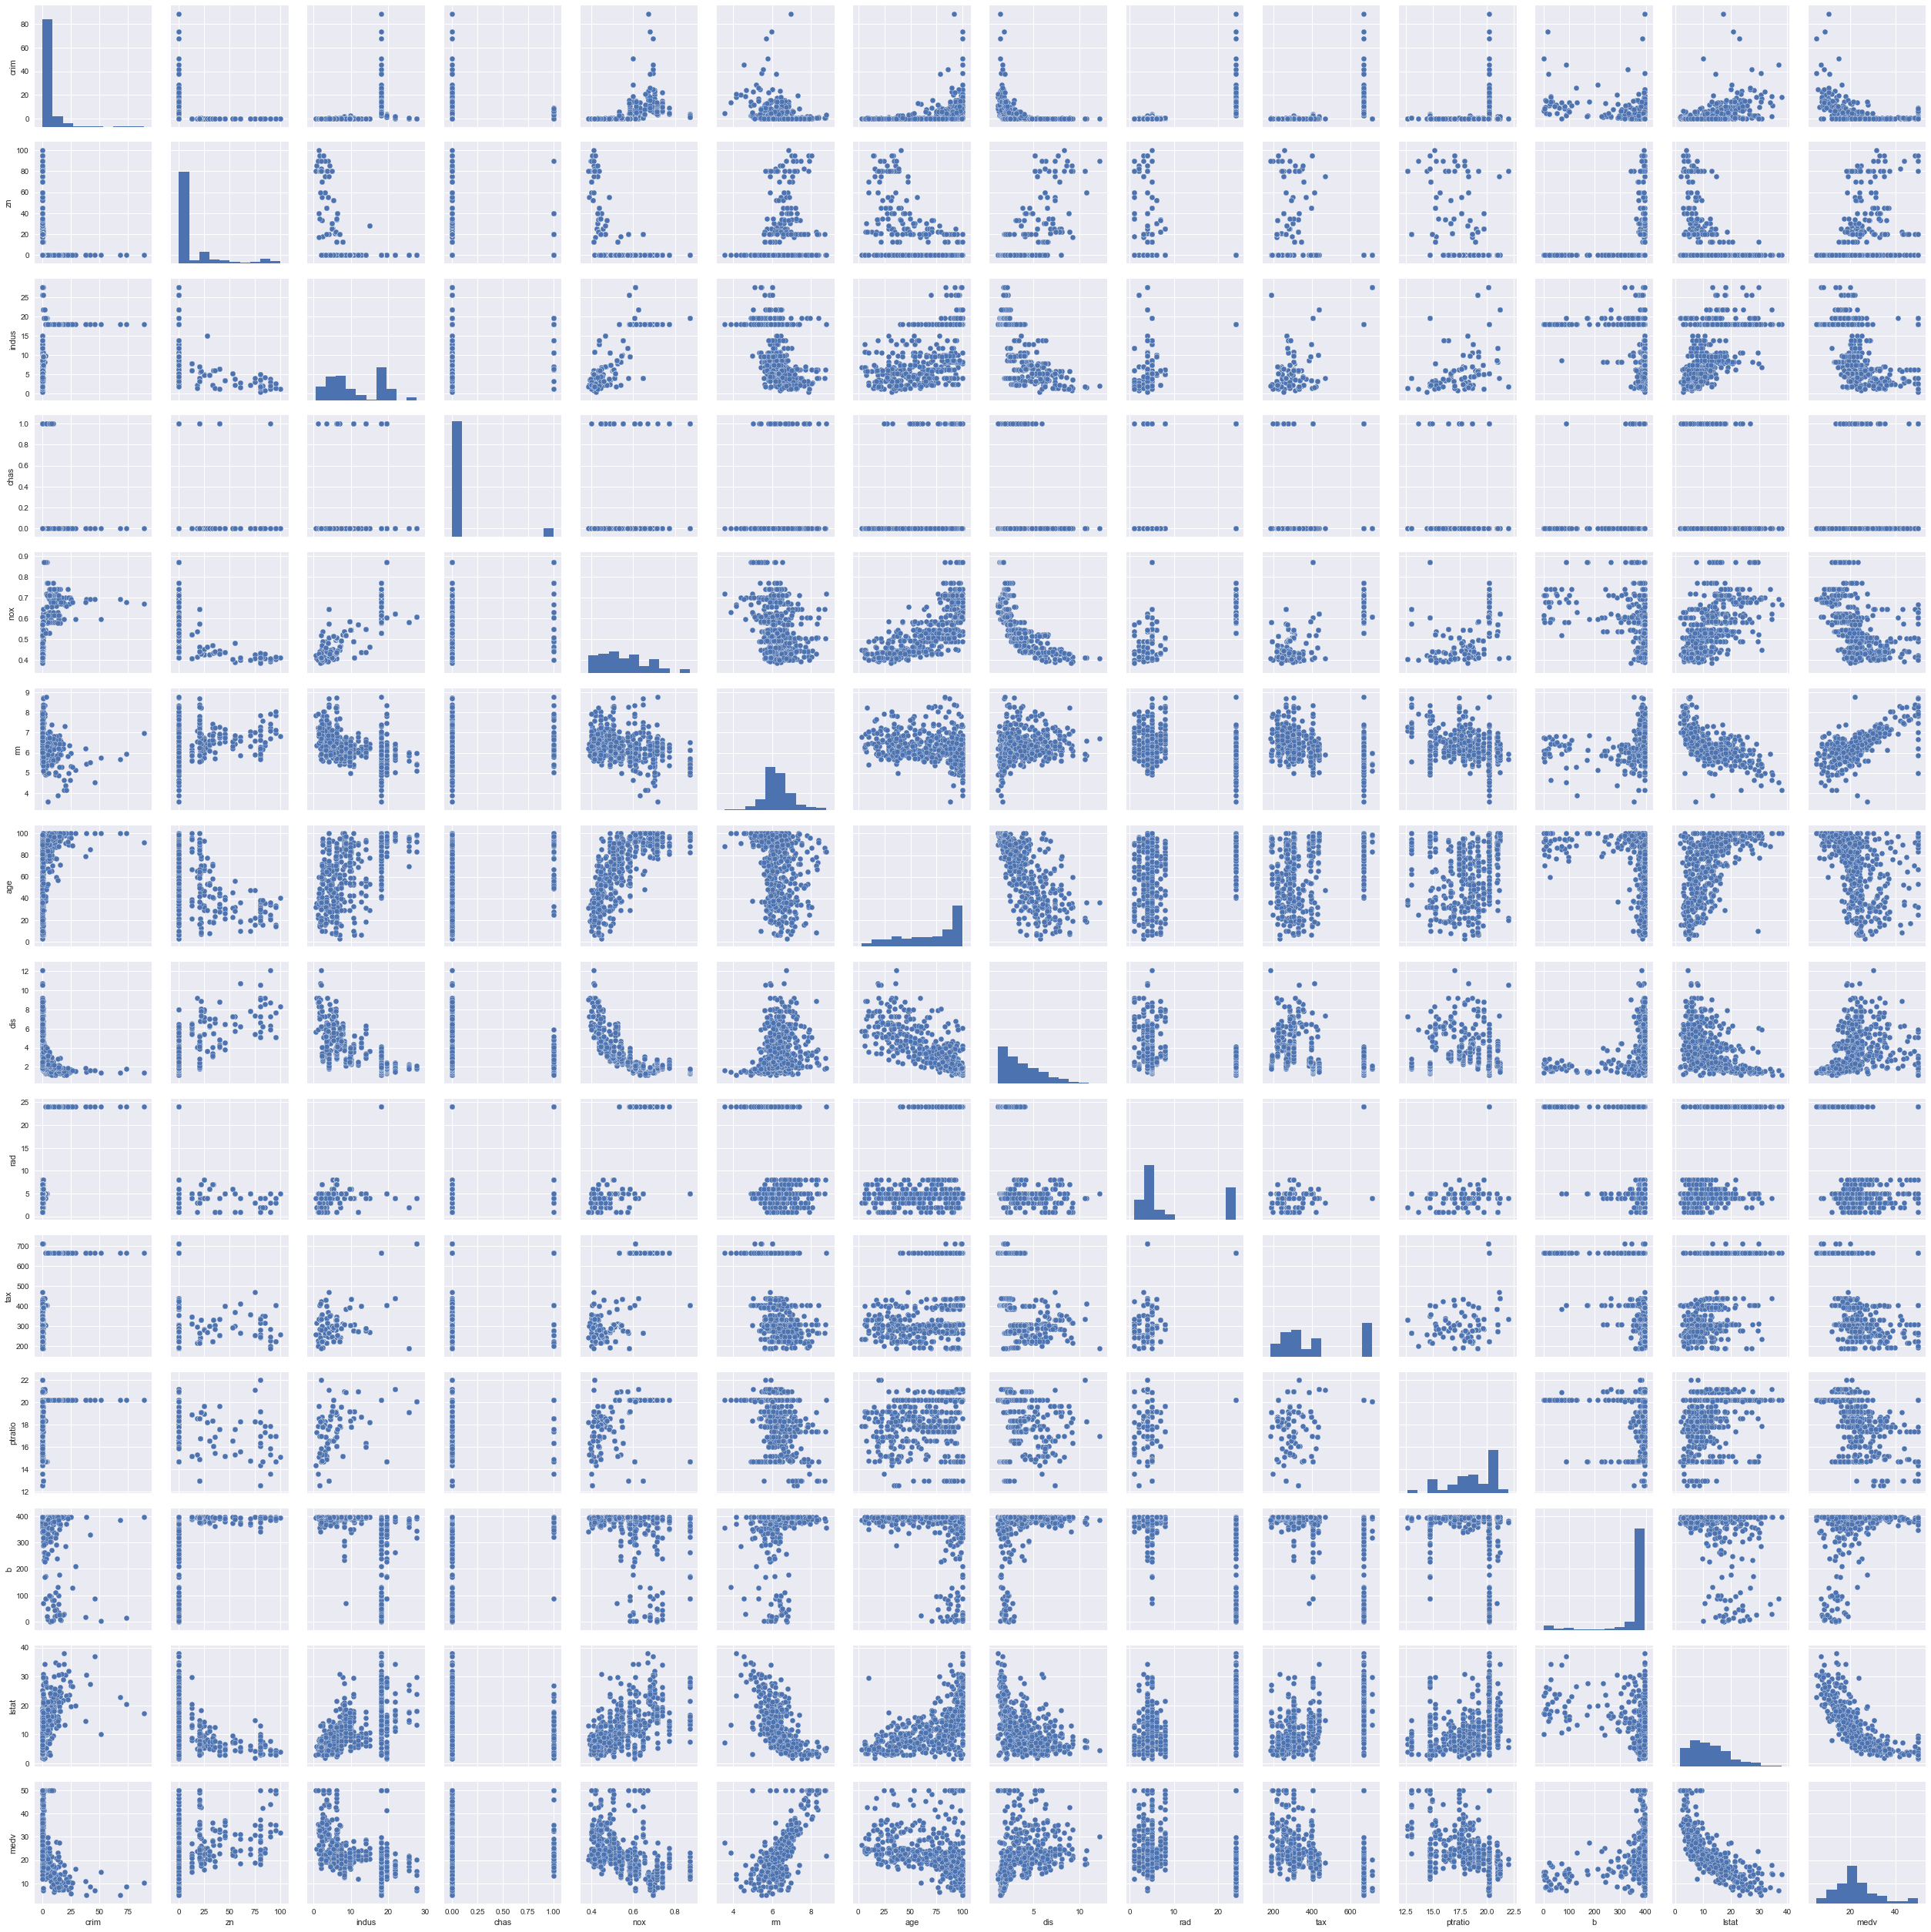

In [5]:
sb.pairplot(boston)

## Correlation Analysis

In [14]:
pd.options.display.float_format = '{:,.6f}'.format
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [15]:
pd.options.display.float_format = '{:,.3f}'.format
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
zn,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
indus,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
chas,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
nox,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
rm,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
age,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
dis,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
rad,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
tax,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


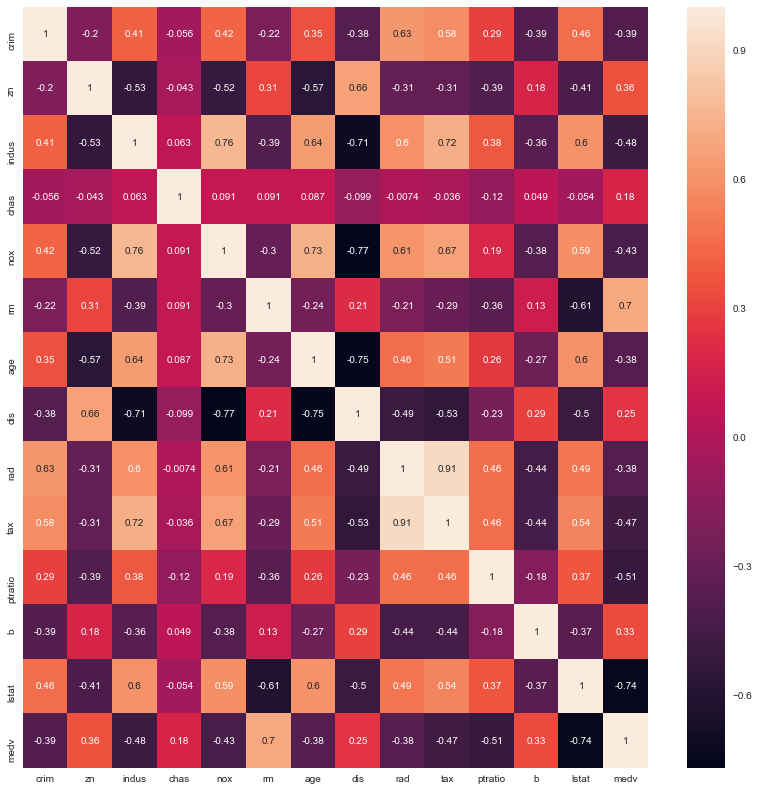

In [10]:
mp.figure(figsize = (14, 14))
sb.heatmap(boston.corr(), annot = True)

### Looking at bottom row (median value), more rooms is correlated with higher median value while a high percentage of lower population and large pupil-teacher ratio is correlated with a lower median value

### Will analyze heatmap with features that had correlation > |.4| with median value

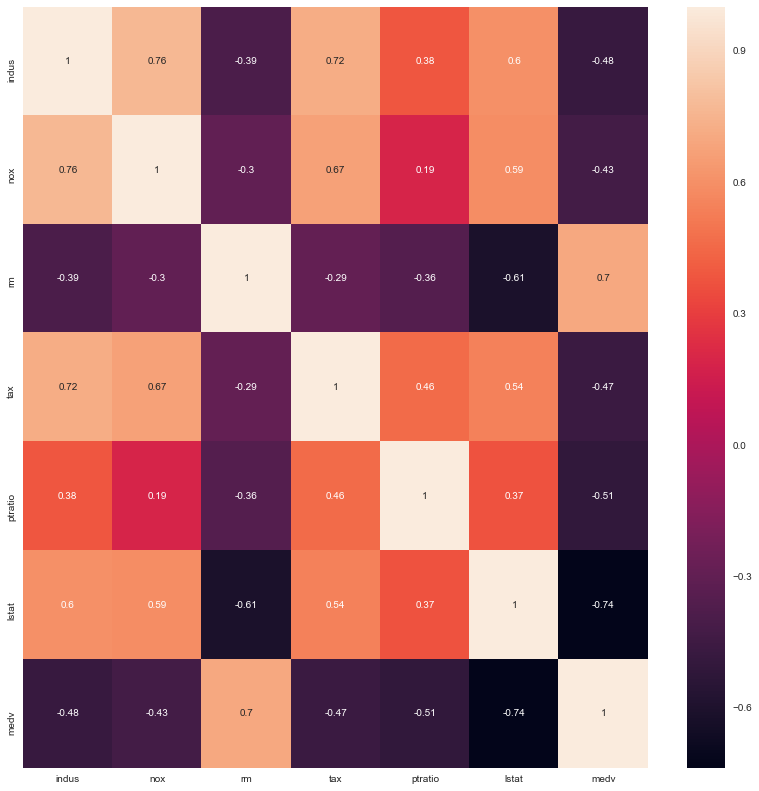

In [22]:
mp.figure(figsize = (14, 14))
feat_names = ['indus', 'nox', 'rm', 'tax', 'ptratio', 'lstat', 'medv']
sb.heatmap(boston[feat_names].corr(), annot = True)

## Linear Regression

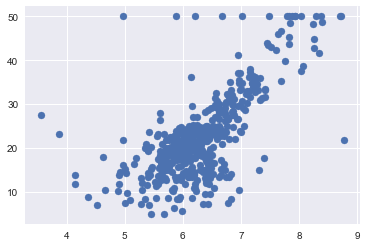

In [38]:
x = boston['rm'].values.reshape(-1, 1)
y = boston['medv'].values
mp.scatter(x, y)

Text(0, 0.5, 'median value')

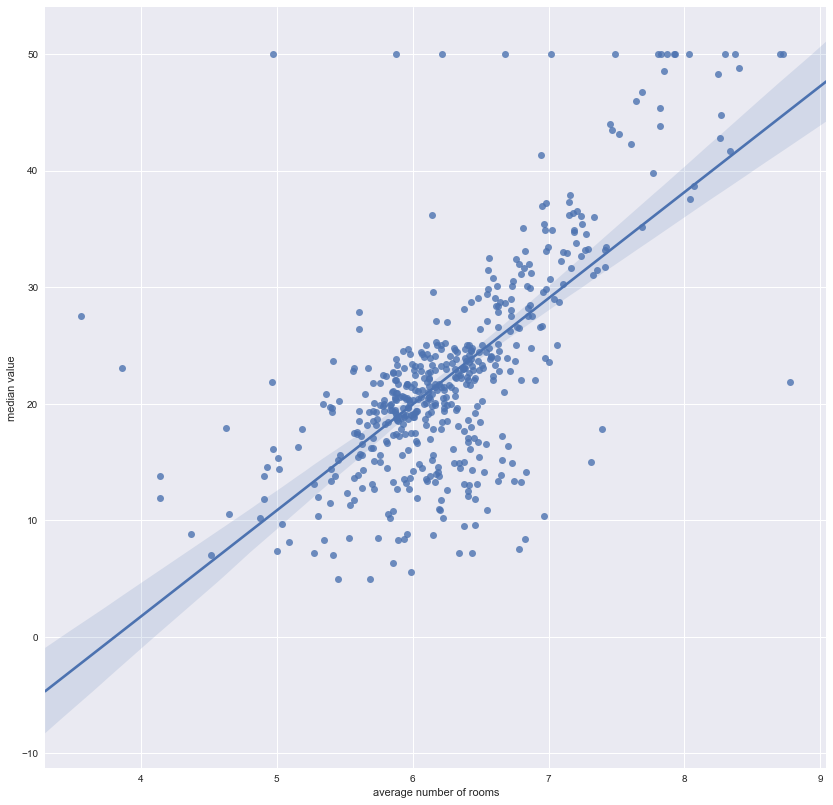

In [43]:
model = LinearRegression()
model.fit(x, y)
x_fit = np.linspace(4, 10).reshape(-1, 1)
y_fit = model.predict(x_fit)

mp.figure(figsize = (14, 14))
sb.regplot(x, y)
mp.xlabel('average number of rooms')
mp.ylabel('median value')

## not a great model from first look, due to mulrivariate nature of data and correlation between median value and other factors

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(101.125, 0.5, 'median value')

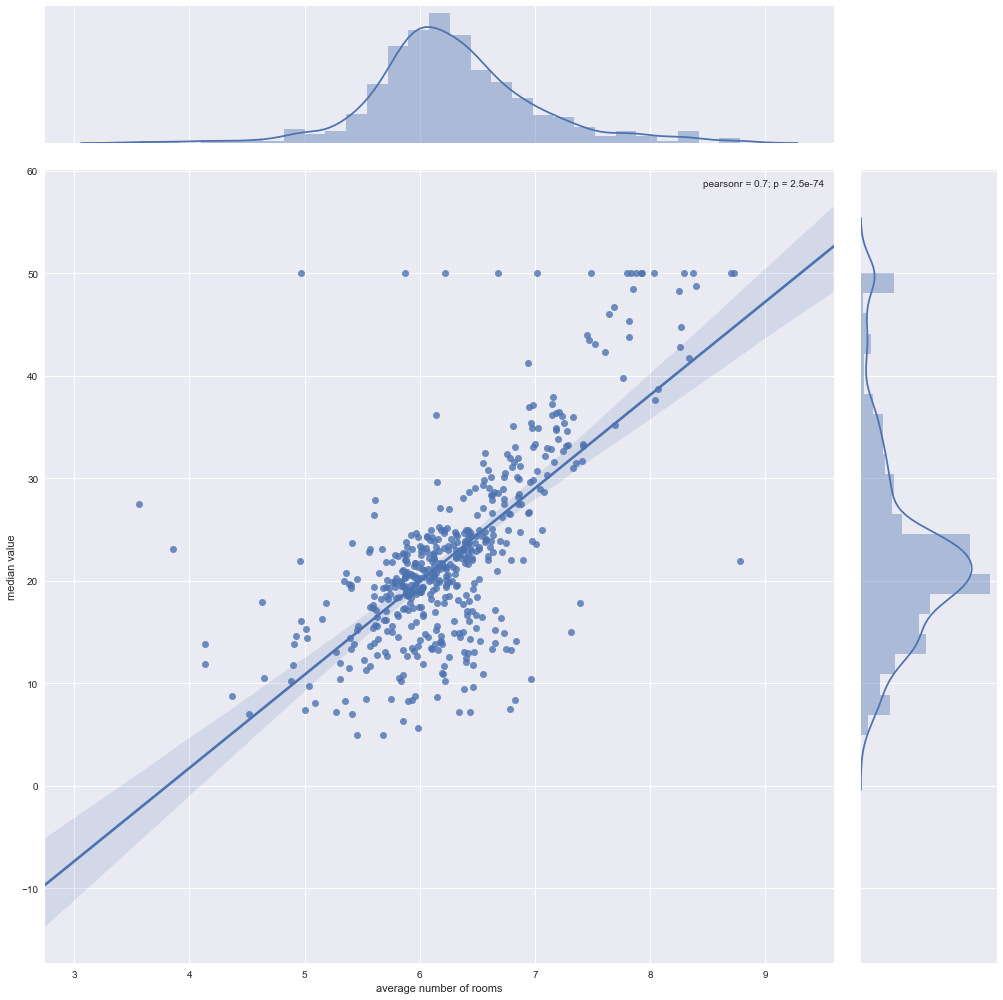

In [47]:
sb.jointplot(x = 'rm', y = 'medv', data = boston, kind = 'reg', size = 14)
mp.xlabel('average number of rooms')
mp.ylabel('median value')

### Room data looks normal, removing the houses listed at 500k may help model

#### in the top right corner the personr matches the 0.7 we saw from corr() earlier, p-value shows this correlation is significant

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(101.125, 0.5, 'median value')

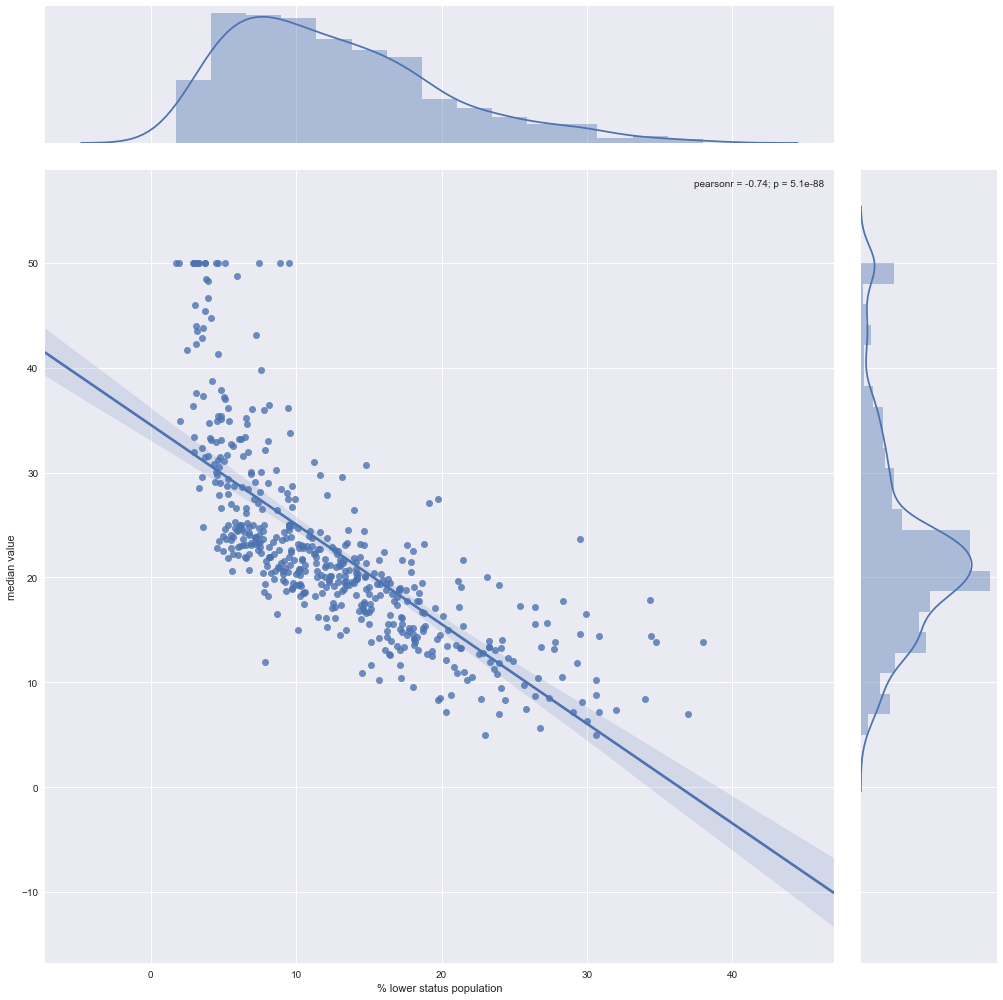

In [48]:
sb.jointplot(x = 'lstat', y = 'medv', data = boston, kind = 'reg', size = 14)
mp.xlabel('% lower status population')
mp.ylabel('median value')

### data does not appear to have a linear relationship, correlation is significant

# Robust Regression RANdom SAmple Consensus (RANSAC) Algorithm

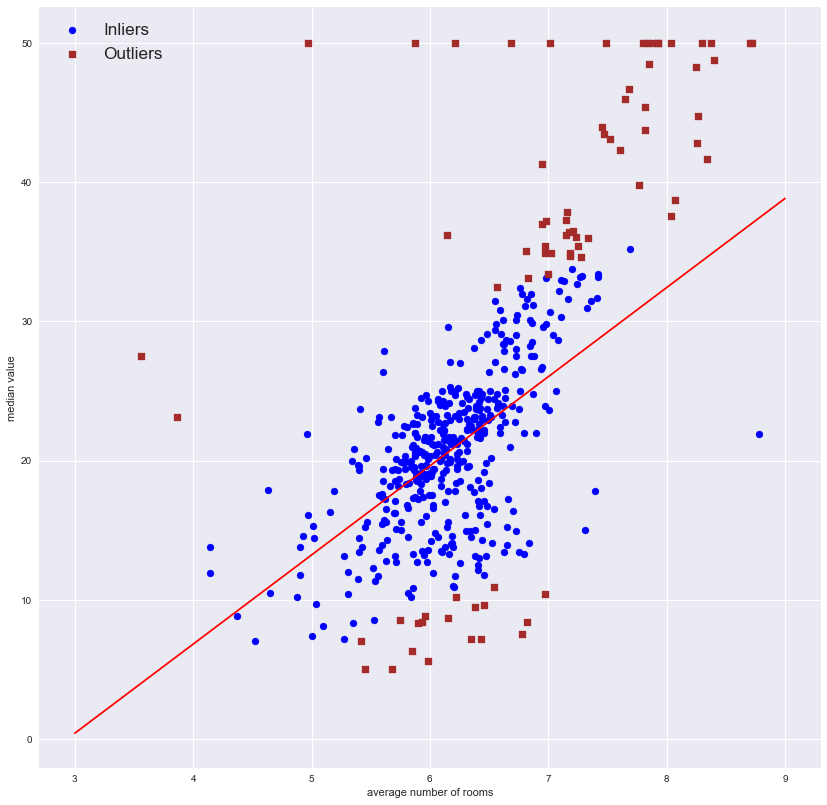

In [64]:
x = boston['rm'].values.reshape(-1, 1)
y = boston['medv'].values
ransac = RANSACRegressor(residual_threshold = 10)
ransac.fit(x, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_x = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_x.reshape(-1, 1))

sb.set(style = 'darkgrid', context = 'notebook')
mp.figure(figsize = (14, 14))
mp.scatter(x[inlier_mask], y[inlier_mask], c = 'blue', marker = 'o', label = 'Inliers')
mp.scatter(x[outlier_mask], y[outlier_mask], c = 'brown', marker = 's', label = 'Outliers')
mp.plot(line_x, line_y_ransac, color = 'red')
mp.xlabel('average number of rooms')
mp.ylabel('median value')
mp.legend(loc = 'upper left', fontsize = 'x-large')

### blue was used in regression algorithm, brown were excluded

## Performance Evaluation of regression

In [69]:
x = boston['lstat'].values.reshape(-1, 1)
y = boston['medv'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

## Residual Analysis

(-10, 50)

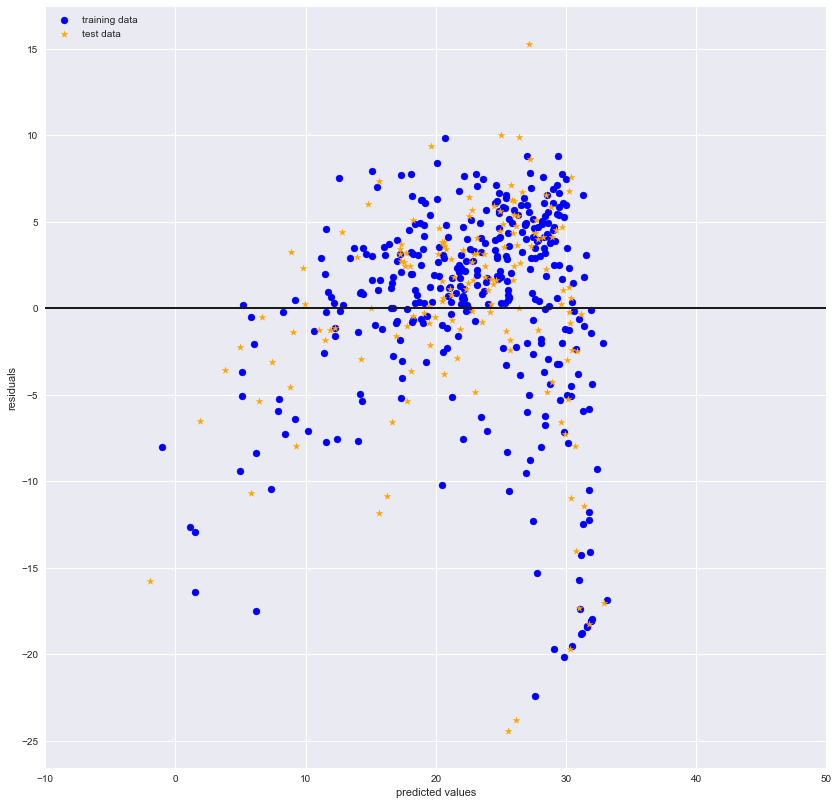

In [71]:
mp.figure(figsize = (14, 14))
mp.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'training data')
mp.scatter(y_test_pred, y_test_pred - y_test, c = 'orange', marker = '*', label = 'test data')
mp.xlabel('predicted values')
mp.ylabel('residuals')
mp.legend(loc = 'upper left')
mp.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'k')
mp.xlim([-10, 50])

## Mean Squared Error (MSE)

In [74]:
mean_squared_error(y_train, y_train_pred)

37.933978172880295

In [75]:
mean_squared_error(y_test, y_test_pred)

39.81715050474416

## Coefficient of Determination R2

In [77]:
r2_score(y_train, y_train_pred)

0.5524780757890007

In [78]:
r2_score(y_test, y_test_pred)

0.5218049526125568